# Molécule 1,3-Oxazole

1. **ATSAFACK FOUELEFACK Fortune Zita**,zita.atsafack@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I
   
19 Janvier 2024

  **1,3-oxazole** :est un composé organique hétérocyclique aromatique important, avec la formule chimique C3H3NO. C'est le composé parent d'une vaste classe de composés hétérocycliques aromatiques appelés oxazoles
 
  * ***Applications***: Les oxazoles ont une large gamme d'applications, notamment en tant que :
 
    -*Intermédiaires pharmaceutiques* : De nombreux médicaments contiennent des oxazoles en raison de leur activité biologique diverse. Par exemple, le rivastigmine, utilisé pour traiter la maladie d'Alzheimer, et le léflunomide, utilisé pour traiter la polyarthrite rhumatoïde, sont des dérivés d'oxazole.ce sont des Agents antitumoraux ,Médicaments antimicrobiens\
![econazole.jpg](./econazole.jpg)
    -*Pesticides* : Certains oxazoles présentent des propriétés insecticides et herbicides
    -*Polymères* : Des oxazoles ont été utilisés pour synthétiser des polymères ayant des propriétés uniques, telles qu'une bonne résistance à la chaleur et aux produits chimiques.



In [207]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

### Creation d'un objet smile

In [208]:
smile=('C1=COC=N1')

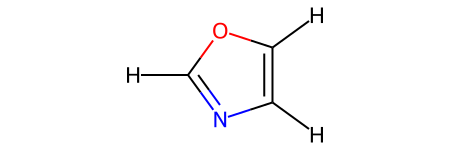

In [210]:
mol=Chem.MolFromSmiles(smile)
mol=AllChem.AddHs(mol)
mol

### Molécule en 3D

In [211]:
mol.GetNumAtoms()

8

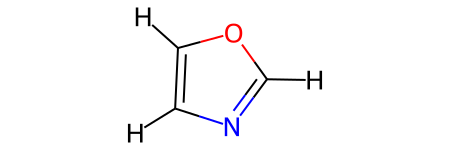

In [212]:
confid = AllChem.EmbedMolecule(mol)
mol


### Optimisation de la conformation 3d de la molécule

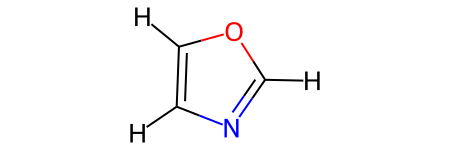

In [213]:

AllChem.UFFOptimizeMolecule(mol)

#ff
mol

## coordonnées 3D des molecules

In [214]:
for i, atom in enumerate(mol.GetAtoms()):
        positions = mol.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C -0.7584467831115914 -0.657715903851269 -0.04978043264226076
C -0.7061910482914688 0.714744958437004 0.013496237025564002
O 0.55486711818303 1.062567268935662 0.06263630860500768
C 1.2648644770369017 -0.042118523424271505 0.031656751561491094
N 0.49526737760689454 -1.147835263846528 -0.03862194282648259
H -1.652755155343055 -1.264116927897414 -0.1008509791798532
H -1.5436413576566255 1.399414130879796 0.022153768272998867
H 2.3460353715759323 -0.06493973923296575 0.05931028918352755


## convertion de l'objet mol rdkit en format XYZ

In [215]:
mol_xyz = Chem.MolToXYZBlock(mol)

# supression de la premiere liugne (numbre d atomes) pour les donnees XYZ 
mol_xyz = '\n'.join(mol_xyz.strip().split('\n')[1:])
print(mol_xyz)


C     -0.758447   -0.657716   -0.049780
C     -0.706191    0.714745    0.013496
O      0.554867    1.062567    0.062636
C      1.264864   -0.042119    0.031657
N      0.495267   -1.147835   -0.038622
H     -1.652755   -1.264117   -0.100851
H     -1.543641    1.399414    0.022154
H      2.346035   -0.064940    0.059310


### Etudions la convergence des ensembles de base pour une série de fonctionnelles de la théorie fonctionnelle de la densité (DFT)


In [216]:
from pyscf import gto
import py3Dmol

In [235]:
mol=gto.Mole(
    atom=mol_xyz,
    basis="6-31G",
    charge=0,      # 0 by default
    spin=0,        # 0 by default, defined as (n_up - n_down)
    unit='Angstrom' # Can also be 'Bohr'
)

mol.build()




In [236]:
# 3D representation
xyz_view = py3Dmol.view(width=300,height=300)
xyz_view.addModel(mol.tostring(format="xyz"),'xyz')
xyz_view.setStyle({'stick':{}, "sphere":{"radius":0.4}})
xyz_view.setBackgroundColor('0xeeeeee')
xyz_view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [237]:
print(f'Le nombre total d\'électrons est {mol.nelectron} et le nombre total d\'électrons (alpha, béta) est {mol.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol.basis}, est {mol.nao_nr()}')
print(f'L\'énergie nucléaire vaut {mol.energy_nuc()} Hartrees')

Le nombre total d'électrons est 36 et le nombre total d'électrons (alpha, béta) est (18, 18)
Le nombre d'orbitales atomiques, dans la base 6-31G, est 51
L'énergie nucléaire vaut 164.7951892926279 Hartrees


####  Calcul de l'objet mf avec RHF

In [243]:
import time
from pyscf import scf

start = time.time()
mf = scf.RHF(mol).run()
mf_time = time.time() - start

converged SCF energy = -244.486217854875


In [244]:
mf_time 

0.48461198806762695

In [245]:
mf.mo_occ

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [246]:
lumo_idx = mf.mo_occ.tolist().index(0.)
homo_idx = lumo_idx- 1
print(f'Les indexes du (HOMO,LUMO) sont {homo_idx,lumo_idx}')

Les indexes du (HOMO,LUMO) sont (17, 18)


##  Calcul DFT 

## Calcul de l'objet mf avec RKS

In [247]:
from pyscf import dft

mfd=dft.RKS(mol)
mfd.kernel()

converged SCF energy = -243.940603513938


-243.94060351393782

In [229]:
mfd.mo_occ

array([2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [248]:
mfd.e_tot

-243.94060351393782

## hybride Fonctionnelle (B3LYP)

In [249]:
mfd.xc='B3LYP'
start = time.time()
mfd_B3LYP = mfd.run()
mfdB3LYP_time = time.time() - start
print(f'mfd_B3LYP est {mfd_B3LYP}')

converged SCF energy = -245.961117783886
mfd_B3LYP est <pyscf.dft.rks.RKS object at 0x7f753b648a90>


In [136]:
mfdB3LYP_time

17.673429012298584

### fonctionelle non hybrides PBE

In [257]:
start = time.time()
mfd.xc='PBE'
mfd_PBE = mfd.run()
mfdPBE_time = time.time() - start

converged SCF energy = -245.685829782094


In [251]:
mfdPBE_time 

5.032702445983887

## Fonctionnelle non hybrides TPSS

In [258]:
start = time.time()
mfd.xc='TPSS'
mfd_TPSS = mfd.run()
mfdTPSS_time = time.time() - start

converged SCF energy = -246.008897850318


In [260]:
mfdTPSS_time 

17.238146543502808

### 

In [261]:
import pandas as pd

In [265]:

Fonctionnelles = ['B3LYP','PBE','TPSS']
Energies = [mfd_B3LYP.e_tot,mfd_PBE.e_tot,mfd_TPSS.e_tot]
Temps = [mfdB3LYP_time,mfdPBE_time,mfdTPSS_time ]

data= {
       "Fonctionnelles":Fonctionnelles,
       "Energies" :Energies,
       "Temps" :Temps
      }
df = pd.DataFrame(data)
df

,Fonctionnelles,Energies,Temps
0,B3LYP,-246.008898,4.860825
1,PBE,-246.008898,5.431683
2,TPSS,-246.008898,17.238147


## Comparons les calculs DFT, MP2, CCSD et CCSD(T)

### Théorie des perturbations de Møller-Plesset - MP2

In [266]:
from pyscf import mp

start = time.time()
mymp2 = mp.MP2(mf).run()
mymp2_time = time.time() - start + mf_time

E(MP2) = -244.986721520677  E_corr = -0.500503665802111
E(SCS-MP2) = -244.97404864969  E_corr = -0.487830794815351


In [267]:
mymp2_time

0.6664087772369385

## Cluster couplé - CCSD

In [269]:
from pyscf import cc

start = time.time()
mycc = cc.CCSD(mf).run()
mycc_time = time.time() - start + mf_time

E(CCSD) = -245.0053137106553  E_corr = -0.5190958557806693


In [270]:
mycc_time

5.392047882080078

### CCSD(T)

In [271]:
start = time.time()
e_ccsd_t = mycc.ccsd_t()
mycct_time = time.time() - start + mf_time
print(f'e_ccsd_t est :{ e_ccsd_t}')

CCSD(T) correction = -0.0185446191200468
e_ccsd_t est :-0.018544619120046818


In [272]:
mycct_time

1.766308069229126

In [274]:

Methodes = ['DFT','MP2','CCSD','CCSD(T)']
Energies = [mfd_B3LYP.e_tot,mymp2.e_tot ,mycc.e_tot ,mycc.e_tot +e_ccsd_t]
Temps = [mfdB3LYP_time,mymp2_time,mycc_time,mycct_time]

data= {
       "Methodes ":Methodes ,
       "Energies" :Energies,
       "Temps" :Temps
      }
df = pd.DataFrame(data)
df

,Methodes,Energies,Temps
0,DFT,-246.008898,4.860825
1,MP2,-244.986722,0.666409
2,CCSD,-245.005314,5.392048
3,CCSD(T),-245.023858,1.766308


## 3 Energie de gap HOMO-LUMO

la bande interdite est donnée par la fpormule $$E_g = E_{\rm LUMO} - E_{\rm HOMO}$$

### Calculs des états excités singulets avec la TDDFT

In [275]:
from pyscf import gto, scf, dft, tddft

In [276]:
mytd = tddft.TDDFT(mfd)
start=time.time()
mytd.kernel()
mytd_time = time.time() - start
mytd.analyze(verbose=4)

Excited State energies (eV)
[5.64133917 6.5235029  7.36094493]

** Singlet excitation energies and oscillator strengths **
Excited State   1:      5.64134 eV    219.78 nm  f=0.0023
      17 -> 19        0.69858
      17 -> 20       -0.10587
Excited State   2:      6.52350 eV    190.06 nm  f=0.1285
      16 -> 19        0.14262
      18 -> 19        0.66105
      18 -> 20        0.18384
Excited State   3:      7.36094 eV    168.44 nm  f=0.0405
      16 -> 19        0.41964
      18 -> 19       -0.23396
      18 -> 20        0.50910

** Transition electric dipole moments (AU) **
state          X           Y           Z        Dip. S.      Osc.
  1        -0.0034     -0.0058      0.1285      0.0166      0.0023
  2        -0.8518      0.2801     -0.0100      0.8042      0.1285
  3         0.3400     -0.3303     -0.0059      0.2247      0.0405

** Transition velocity dipole moments (imaginary part, AU) **
state          X           Y           Z        Dip. S.      Osc.
  1        -0.0013  

In [277]:
mytd_time

26.1469988822937

### Calculs des états excités singulets avec la TDA

In [278]:
mytda = tddft.TDA(mfd)
start=time.time()
mytda.kernel()
mytda_time = time.time() - start
mytda.analyze(verbose=4)

Excited State energies (eV)
[5.65677204 6.85217559 7.60516143]

** Singlet excitation energies and oscillator strengths **
Excited State   1:      5.65677 eV    219.18 nm  f=0.0028
      17 -> 19        0.69652
      17 -> 20       -0.11579
Excited State   2:      6.85218 eV    180.94 nm  f=0.1339
      16 -> 19        0.25238
      18 -> 19        0.56248
      18 -> 20        0.30445
Excited State   3:      7.60516 eV    163.03 nm  f=0.1191
      16 -> 19       -0.37798
      18 -> 19        0.38381
      18 -> 20       -0.42638

** Transition electric dipole moments (AU) **
state          X           Y           Z        Dip. S.      Osc.
  1        -0.0037     -0.0064      0.1409      0.0199      0.0028
  2        -0.8610      0.2371     -0.0121      0.7976      0.1339
  3        -0.6727      0.4317      0.0016      0.6390      0.1191

** Transition velocity dipole moments (imaginary part, AU) **
state          X           Y           Z        Dip. S.      Osc.
  1        -0.0009  

In [279]:
mytda_time

25.876469135284424

###  energie d'exitation de l'etat singlet et force d'oxillateur

In [280]:
# Singlet excitation energies
ee_singlets = mytda.e

# Singlet oscillators strength
OS_singlets = mytda.oscillator_strength(gauge='length')

### Calculs des états excités triplets avec la TDDFT

In [281]:
mytda.singlet = False
mytda.kernel()
mytda.analyze(verbose=4)

Excited State energies (eV)
[4.22789043 5.11502334 5.81387198]

** Triplet excitation energies and oscillator strengths **
Excited State   1:      4.22789 eV    293.25 nm  f=0.2650
      18 -> 19        0.69763
Excited State   2:      5.11502 eV    242.39 nm  f=0.0148
      17 -> 19        0.69249
      17 -> 20        0.13961
Excited State   3:      5.81387 eV    213.26 nm  f=0.6393
      16 -> 19       -0.22670
      18 -> 20        0.66523

** Transition electric dipole moments (AU) **
state          X           Y           Z        Dip. S.      Osc.
  1        -1.4683      0.6339     -0.0104      2.5579      0.2650
  2        -0.0091     -0.0155      0.3433      0.1182      0.0148
  3        -0.7631     -1.9732     -0.1092      4.4880      0.6393

** Transition velocity dipole moments (imaginary part, AU) **
state          X           Y           Z        Dip. S.      Osc.
  1        -0.2061      0.0967     -0.0011      0.0518      0.2224
  2        -0.0029     -0.0049      0.1088 

In [282]:
# Triplet excitation energies
ee_triplets = mytda.e

### Calculs des propriété

In [287]:
import os
import numpy as np
from pyscf.data import nist

au2ev = nist.HARTREE2EV

# Index of HOMO and LUMO
lumo_idx = mfd.mo_occ.tolist().index(0.)
homo_idx = lumo_idx - 1

# Calculate the gap Homo-LUMO
E_HOMO = mfd.mo_energy[homo_idx]*au2ev
E_LUMO = mfd.mo_energy[lumo_idx]*au2ev
E_g = abs(E_HOMO - E_LUMO)

# fluorescence energy
f_energy = min(ee_singlets)

# Singlet-Tiplet gap
gap_ST = min(ee_singlets) - min(ee_triplets)

# Oscillator strength
OStr = OS_singlets[0]

# Lifetime calculation in au
c = nist.LIGHT_SPEED # in au
time_au = 2.4188843265857E-17 # in au

tau_au = c**3 / (2 * (f_energy)**2 * OStr) # in au
tau = tau_au * time_au # in seconds

# Multi-Objective function
mobj = OStr - gap_ST * au2ev - np.abs(f_energy * au2ev - 3.2)

In [288]:
import pandas as pd

# Create the results dataframe
list_results_TDA = [E_HOMO, E_LUMO, E_g, f_energy* au2ev, gap_ST* au2ev, OStr, tau* 1E+9, mobj]
dict_results_TDA = {'eV/ns': list_results_TDA}

df_TDA = pd.DataFrame(dict_results_TDA,
                    index = ['Homo energy', 'LUMO energy', 'Gap energy', 
                             'Fluorescence energy',
                             'Singlet-Triplet gap',
                             'Oscillator strength',
                             'Lifetime',
                             'Multi-Obj'])

df_TDA

,eV/ns
Homo energy,-6.148308
LUMO energy,-0.955251
Gap energy,5.193058
Fluorescence energy,5.656772
Singlet-Triplet gap,1.428882
Oscillator strength,0.002758
Lifetime,261.159299
Multi-Obj,-3.882896


### Spectre UV/Vis

In [289]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [290]:
def run_spectral_analysis(mol, xc="lda"):
    n_states=15
    spectral_width=0.1

    # Ground State DFT
    mf = dft.RKS(mol, xc=xc).run()

    # Excited State DFT
    mytd = tddft.TDDFT(mf)
    mytd.nstates = n_states
    mytd.max_space = 100
    mytd.max_cycle = 200
    mytd.kernel();
    mytd.analyze()
    osc_strengths = mytd.oscillator_strength()[:n_states-5]

    # Convolve lineshapes to make spectra
    energies_ev = mytd.e[:n_states-5]*au2ev
    x_range = np.linspace(energies_ev.min()*0.9, energies_ev.max()*1.1, num=1000)
    intensity = np.zeros(x_range.size)

    for e, f in zip(energies_ev, osc_strengths):
        intensity += gaussian(x_range, e, spectral_width) * f

    # Rough Normalization
    dx = (x_range[-1] - x_range[0])/x_range.size
    area = (intensity*dx).sum()
    intensity /= area


    return x_range, intensity

In [ ]:
import time

data = {"Excitation Energy (eV)":[], "Intensity":[], "Exchange-Correlation Functional":[]}

xcs = ["TPSS", "PBE", "B3LYP"]

for xc in xcs:
    ti = time.time()
    x_range, intensity = run_spectral_analysis(mol, xc=xc)

    data["Excitation Energy (eV)"] += x_range.tolist()
    data["Intensity"] += intensity.tolist()
    data["Exchange-Correlation Functional"] += [xc]*x_range.size
    tf = time.time()
    print(f"Time for {xc.upper()} calculations: {tf-ti:.2f}\n")

df = pd.DataFrame(data)

In [ ]:
import plotly.express as px
fig = px.line(df, x="Excitation Energy (eV)", y="Intensity", markers=True, color="Exchange-Correlation Functional")
fig.show()

In [ ]:
df